# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.12/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


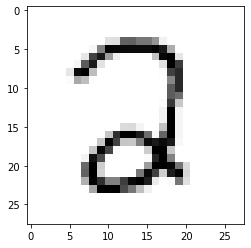

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2391
Training Accuracy: 0.7191, Testing Accuracy: 0.7198



Epoch 10, Loss 0.1064
Training Accuracy: 0.9078, Testing Accuracy: 0.9173



Epoch 20, Loss 0.0628
Training Accuracy: 0.9382, Testing Accuracy: 0.9451



Epoch 30, Loss 0.0476
Training Accuracy: 0.9479, Testing Accuracy: 0.9567



Epoch 40, Loss 0.0402
Training Accuracy: 0.9550, Testing Accuracy: 0.9592



Epoch 50, Loss 0.036
Training Accuracy: 0.9607, Testing Accuracy: 0.9632



Epoch 60, Loss 0.0332
Training Accuracy: 0.9631, Testing Accuracy: 0.9642



Epoch 70, Loss 0.0311
Training Accuracy: 0.9649, Testing Accuracy: 0.9657



Epoch 80, Loss 0.0296
Training Accuracy: 0.9661, Testing Accuracy: 0.9667



Epoch 90, Loss 0.0283
Training Accuracy: 0.9670, Testing Accuracy: 0.9667



Epoch 100, Loss 0.0272
Training Accuracy: 0.9684, Testing Accuracy: 0.9677



Epoch 110, Loss 0.0263
Training Accuracy: 0.9692, Testing Accuracy: 0.9682



Epoch 120, Loss 0.0256
Training Accuracy: 0.9704, Testing Accuracy: 0.9688



Epoch 130, Loss 0.0248
Training Accuracy: 0.9710, Testing Accuracy: 0.9688



Epoch 140, Loss 0.0242
Training Accuracy: 0.9717, Testing Accuracy: 0.9693



Epoch 150, Loss 0.0236
Training Accuracy: 0.9724, Testing Accuracy: 0.9698



Epoch 160, Loss 0.0231
Training Accuracy: 0.9734, Testing Accuracy: 0.9708



Epoch 170, Loss 0.0226
Training Accuracy: 0.9742, Testing Accuracy: 0.9718



Epoch 180, Loss 0.0221
Training Accuracy: 0.9750, Testing Accuracy: 0.9718



Epoch 190, Loss 0.0217
Training Accuracy: 0.9757, Testing Accuracy: 0.9718



Epoch 200, Loss 0.0212
Training Accuracy: 0.9763, Testing Accuracy: 0.9723



Epoch 210, Loss 0.0208
Training Accuracy: 0.9770, Testing Accuracy: 0.9718



Epoch 220, Loss 0.0205
Training Accuracy: 0.9774, Testing Accuracy: 0.9723



Epoch 230, Loss 0.0201
Training Accuracy: 0.9777, Testing Accuracy: 0.9728



Epoch 240, Loss 0.0197
Training Accuracy: 0.9784, Testing Accuracy: 0.9728



Epoch 250, Loss 0.0194
Training Accuracy: 0.9786, Testing Accuracy: 0.9733



0.001968570162606061

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.253
Training Accuracy: 0.6564, Testing Accuracy: 0.6386



Epoch 10, Loss 0.1007
Training Accuracy: 0.9115, Testing Accuracy: 0.9199



Epoch 20, Loss 0.0776
Training Accuracy: 0.9309, Testing Accuracy: 0.9380



Epoch 30, Loss 0.067
Training Accuracy: 0.9372, Testing Accuracy: 0.9425



Epoch 40, Loss 0.0607
Training Accuracy: 0.9403, Testing Accuracy: 0.9486



Epoch 50, Loss 0.0563
Training Accuracy: 0.9448, Testing Accuracy: 0.9541



Epoch 60, Loss 0.0531
Training Accuracy: 0.9467, Testing Accuracy: 0.9556



Epoch 70, Loss 0.0506
Training Accuracy: 0.9498, Testing Accuracy: 0.9561



Epoch 80, Loss 0.0486
Training Accuracy: 0.9501, Testing Accuracy: 0.9572



Epoch 90, Loss 0.047
Training Accuracy: 0.9513, Testing Accuracy: 0.9587



Epoch 100, Loss 0.0456
Training Accuracy: 0.9525, Testing Accuracy: 0.9587



Epoch 110, Loss 0.0444
Training Accuracy: 0.9533, Testing Accuracy: 0.9597



Epoch 120, Loss 0.0434
Training Accuracy: 0.9546, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0424
Training Accuracy: 0.9552, Testing Accuracy: 0.9637



Epoch 140, Loss 0.0416
Training Accuracy: 0.9563, Testing Accuracy: 0.9637



Epoch 150, Loss 0.0409
Training Accuracy: 0.9572, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0402
Training Accuracy: 0.9579, Testing Accuracy: 0.9642



Epoch 170, Loss 0.0396
Training Accuracy: 0.9581, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0391
Training Accuracy: 0.9589, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0386
Training Accuracy: 0.9595, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0381
Training Accuracy: 0.9602, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0377
Training Accuracy: 0.9607, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0373
Training Accuracy: 0.9609, Testing Accuracy: 0.9667



Epoch 230, Loss 0.0369
Training Accuracy: 0.9610, Testing Accuracy: 0.9667



Epoch 240, Loss 0.0365
Training Accuracy: 0.9612, Testing Accuracy: 0.9677



Epoch 250, Loss 0.0362
Training Accuracy: 0.9611, Testing Accuracy: 0.9667



0.04384030604499352

### Comparing results of NN and LR

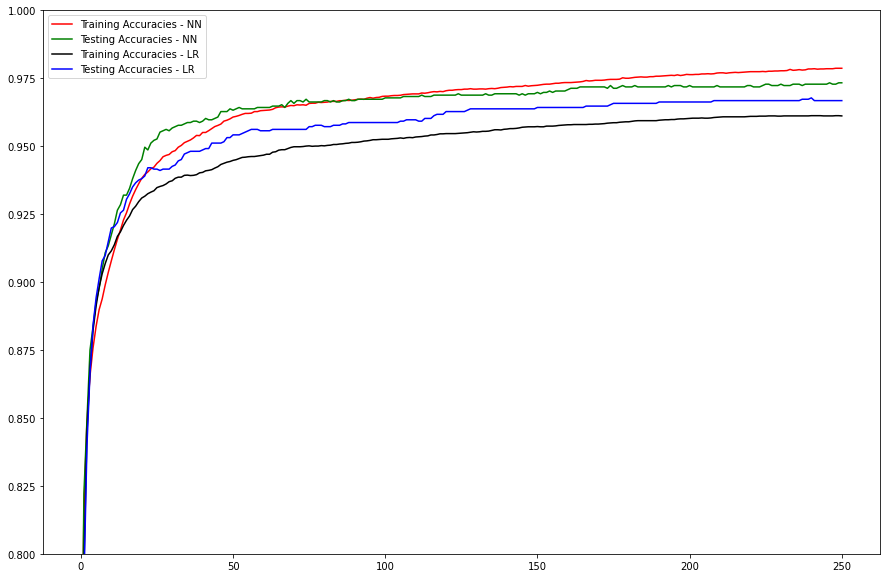

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

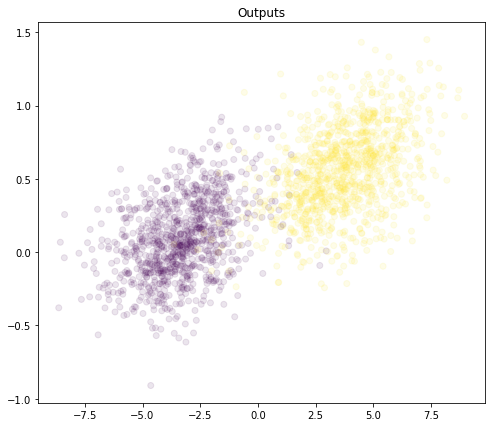

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

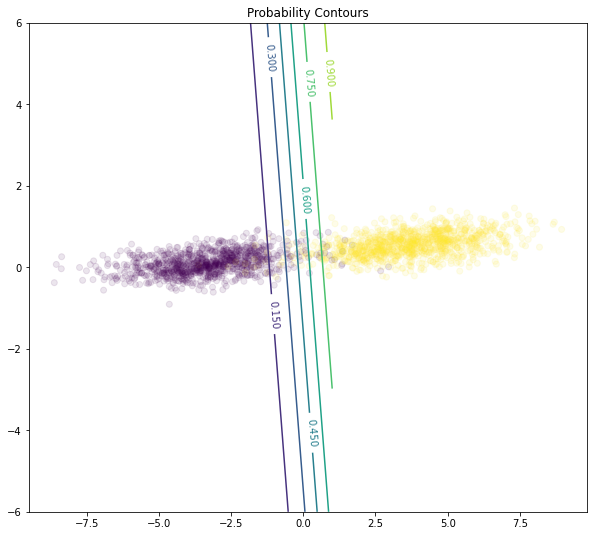

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );